In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.engine.base_layer import Layer
from keras.layers import Activation, Dense
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import np_utils
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

class Mish(Layer):
    '''
    Mish Activation Function.
    .. math::
        mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + e^{x}))
    Shape:
        - Input: Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
        - Output: Same shape as the input.
    Examples:
        >>> X_input = Input(input_shape)
        >>> X = Mish()(X_input)
    '''

    def __init__(self, **kwargs):
        super(Mish, self).__init__(**kwargs)
        self.supports_masking = True

    def call(self, inputs):
        return inputs * K.tanh(K.softplus(inputs))

    def get_config(self):
        base_config = super(Mish, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

In [0]:
def mish(x):
	return keras.layers.Lambda(lambda x: x*K.tanh(K.softplus(x)))(x)

In [29]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


def model_relu(num_layers, x_train, y_train, batch_size, epochs, x_test, y_test):
  model = Sequential()
  model.add(Conv2D(20, kernel_size=(5, 5),
                   activation=mish,
                   input_shape=input_shape))
  model.add(Conv2D(50, (5, 5), activation=mish))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  for layers in range(num_layers):
    model.add(Dense(500))
    model.add(BatchNormalization())
    model.add(Mish())
    model.add(Dropout(0.25))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.SGD(),
                metrics=['accuracy'])

  model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  return score[1]

l1 = []
for x in range(12,23):
  test_acc = model_relu(x,  x_train, y_train, batch_size, epochs, x_test, y_test)
  l1.append(test_acc)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 61s 1ms/step - loss: 1.5130 - acc: 0.4793 - val_loss: 0.4878 - val_acc: 0.8594
Epoch 2/10
60000/60000 [==============================] - 28s 471us/step - loss: 0.5191 - acc: 0.8393 - val_loss: 0.2602 - val_acc: 0.9230
Epoch 3/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.3460 - acc: 0.8968 - val_loss: 0.1868 - val_acc: 0.9442
Epoch 4/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.2674 - acc: 0.9204 - val_loss: 0.1227 - val_acc: 0.9631
Epoch 5/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.2164 - acc: 0.9378 - val_loss: 0.1030 - val_acc: 0.9672
Epoch 6/10
60000/60000 [==============================] - 28s 466us/step - loss: 0.1858 - acc: 0.9464 - val_loss: 0.0852 - val_acc: 0.9746
Epoch 7/10
60000/60000 [=====================

In [0]:
l2 = [0.982,
 0.9791,
 0.9795,
 0.9752,
 0.972,
 0.9622,
 0.9557,
 0.9174,
 0.7358,
 0.6341,
 0.3968]
l2 = [i * 100 for i in l2]

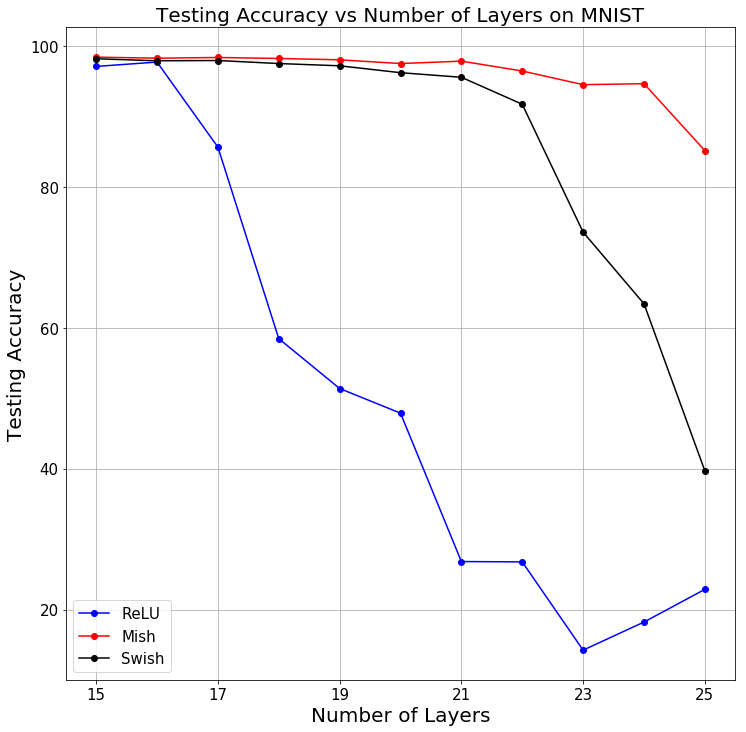

In [63]:
positions = (0, 2, 4, 6, 8, 10)
labels = (15, 17, 19, 21, 23, 25)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
plt.plot(l,'b-o', label= "ReLU")
plt.plot(l1, 'r-o', label= "Mish")
plt.plot(l2, 'k-o', label= "Swish")
plt.legend(loc='best', fontsize=15)
plt.xticks(positions, labels)
plt.grid()
plt.xlabel('Number of Layers', fontsize = 20)
plt.ylabel('Testing Accuracy', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.title.set_text('Testing Accuracy vs Number of Layers on MNIST')
ax.title.set_fontsize(20)
plt.savefig("layersacc.png", bbox_inches = 'tight')
plt.show()